In [67]:
import pandas as pd;

## Preparando os Datasets



In [68]:
import os
import pandas as pd

# Transforma o txt do arquivo treino positivo em um pd dataset
pasta = "/Users/gabriel_goncalves/Downloads/aclImdb/train/pos"  # Pasta onde estão os arquivos 

# Lista todos os arquivos .txt
arquivos_txt = [f for f in os.listdir(pasta) if f.endswith('.txt')]


dados = []

for arquivo in arquivos_txt:
    caminho_completo = os.path.join(pasta, arquivo)
    with open(caminho_completo, 'r', encoding='utf-8') as f:
        conteudo = f.read()

        partes_nome = arquivo.split('_')  
        id_unico = partes_nome[0]  
        rating = partes_nome[1].split('.')[0]  

        dados.append({
            'id': id_unico,
            'rating': int(rating),
            'conteudo': conteudo
        })

# Cria um DataFrame com os dados
df = pd.DataFrame(dados)

# Mostra o DataFrame
print(df)

          id  rating                                           conteudo
0       4715       9  For a movie that gets no respect there sure ar...
1      12390       8  Bizarre horror movie filled with famous faces ...
2       8329       7  A solid, if unremarkable film. Matthau, as Ein...
3       9063       8  It's a strange feeling to sit alone in a theat...
4       3092      10  You probably all already know this by now, but...
...      ...     ...                                                ...
12495   9707      10  About a year ago I finally gave up on American...
12496     35       8  When I saw the elaborate DVD box for this and ...
12497   6034      10  Last November, I had a chance to see this film...
12498   2780       9  Great movie -I loved it. Great editing and use...
12499    437       9  Enchanted April is a tone poem, an impressioni...

[12500 rows x 3 columns]


In [69]:
#analisando dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12500 non-null  object
 1   rating    12500 non-null  int64 
 2   conteudo  12500 non-null  object
dtypes: int64(1), object(2)
memory usage: 293.1+ KB


In [70]:
#transformando id em int
df['id'] = df['id'].astype(int)

In [71]:
# organizando id/index
df_ordenado = df.sort_values(by="id", ascending=True)
df_ordenado = df_ordenado.reset_index(drop=True)
df_ordenado.head()


,id,rating,conteudo
0,0,9,Bromwell High is a cartoon comedy. It ran at t...
1,1,7,"If you like adult comedy cartoons, like South ..."
2,2,9,Bromwell High is nothing short of brilliant. E...
3,3,10,"""All the world's a stage and its people actors..."
4,4,8,FUTZ is the only show preserved from the exper...


In [72]:
#definindo bool para os positivos
df_ordenado["is_pos"] = 1

In [73]:
#dropando id que nao sera usado
df_ordenado.drop(axis=1,labels="id",inplace=True)
df_ordenado.head()

,rating,conteudo,is_pos
0,9,Bromwell High is a cartoon comedy. It ran at t...,1
1,7,"If you like adult comedy cartoons, like South ...",1
2,9,Bromwell High is nothing short of brilliant. E...,1
3,10,"""All the world's a stage and its people actors...",1
4,8,FUTZ is the only show preserved from the exper...,1


In [74]:
import os
import pandas as pd

# Mesma coisa porem para a pasta com txts de reviews negativas
pasta = "/Users/gabriel_goncalves/Downloads/aclImdb/train/neg"  


arquivos_txt = [f for f in os.listdir(pasta) if f.endswith('.txt')]


dados = []


for arquivo in arquivos_txt:
    caminho_completo = os.path.join(pasta, arquivo)
    with open(caminho_completo, 'r', encoding='utf-8') as f:
        conteudo = f.read()

       
        partes_nome = arquivo.split('_')  
        id_unico = partes_nome[0]  
        rating = partes_nome[1].split('.')[0]  

       
        dados.append({
            'id': id_unico,
            'rating': int(rating),  
            'conteudo': conteudo
        })


df_neg = pd.DataFrame(dados)


print(df_neg)

          id  rating                                           conteudo
0       1821       4  Working with one of the best Shakespeare sourc...
1      10402       1  Well...tremors I, the original started off in ...
2       1062       4  Ouch! This one was a bit painful to sit throug...
3       9056       1  I've seen some crappy movies in my life, but t...
4       5392       3  "Carriers" follows the exploits of two guys an...
...      ...     ...                                                ...
12495   3307       3  My comments may be a bit of a spoiler, for wha...
12496   2240       4  The "saucy" misadventures of four au pairs who...
12497  11556       1  Oh, those Italians! Assuming that movies about...
12498   4617       3  Eight academy nominations? It's beyond belief....
12499   9788       3  Not that I dislike childrens movies, but this ...

[12500 rows x 3 columns]


In [75]:
#mesmo processos de transformacao porem para o dataset de negativos, bool=0
df_neg['id'] = df_neg['id'].astype(int)
df_ordenado_neg = df_neg.sort_values(by="id", ascending=True)
df_ordenado_neg = df_ordenado_neg.reset_index(drop=True)
df_ordenado_neg["is_pos"] = 0

In [76]:
df_ordenado_neg.drop(axis=1,labels="id",inplace=True)
df_ordenado_neg.head()

,rating,conteudo,is_pos
0,3,Story of a man who has unnatural feelings for ...,0
1,1,Robert DeNiro plays the most unbelievably inte...,0
2,1,"I saw the capsule comment said ""great acting.""...",0
3,4,If I had not read Pat Barker's 'Union Street' ...,0
4,4,This fanciful horror flick has Vincent Price p...,0


In [77]:
#juntando os datasets
df_teste = pd.concat([df_ordenado, df_ordenado_neg], axis=0)
df_teste.describe()

,rating,is_pos
count,25000.000000,25000.00000
mean,5.477720,0.50000
std,3.466477,0.50001
min,1.000000,0.00000
25%,2.000000,0.00000
50%,5.500000,0.50000
75%,9.000000,1.00000
max,10.000000,1.00000


In [78]:
#algumas importacoes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
#import SentenceTransformer

## Pré Processamento

In [79]:
# removendo pontuacoes e stop-worlds
import re
from nltk.corpus import stopwords
import nltk

# baixa stopwords do NLTK 
nltk.download('stopwords')

# Carregar a lista de stopwords ingles
stop_words = set(stopwords.words('english'))


def clean_text(text):
    #caracteres especiais
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    #letras minúsculas
    text = text.lower().strip()
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text


df_teste["conteudo"] = df_teste["conteudo"].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriel_goncalves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
df_teste["conteudo"]

0        bromwell high cartoon comedy ran time programs...
1        like adult comedy cartoons like south park nea...
2        bromwell high nothing short brilliant expertly...
3        worlds stage people actors itor something like...
4        futz show preserved experimental theatre movem...
                               ...                        
12495    ok love bad horror especially love horror bad ...
12496    brutally honest loved watching severed thats i...
12497    im sure folks texaslouisiana border must good ...
12498    film kernel really good story work men women c...
12499    went movie sneak preview austria didnt idea go...
Name: conteudo, Length: 25000, dtype: object

In [81]:
import numpy as np

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
# Carregar o modelo Sentence Transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#separando treino e teste ------- TEMPORARIO -------------
X_train, X_test, y_train, y_test = train_test_split(df_teste["conteudo"], df_teste["is_pos"], test_size=0.3, random_state=17,shuffle=True)

# Gerar embeddings para o conjunto de treino e teste
train_embeddings = model.encode(X_train.tolist())
test_embeddings = model.encode(X_test.tolist())

In [83]:
print(train_embeddings.shape)  # Deve ser (n_amostras, n_características)
print(test_embeddings.shape)   # Deve ser (n_amostras, n_características)

(17500, 384)
(7500, 384)


## Modelo

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Treinar classificador ---- Testar depois------
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_embeddings, y_train)

RandomForestClassifier(random_state=42)

In [85]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(test_embeddings)

# Avaliar desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7721333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      3679
           1       0.77      0.78      0.78      3821

    accuracy                           0.77      7500
   macro avg       0.77      0.77      0.77      7500
weighted avg       0.77      0.77      0.77      7500



## Visualização

In [86]:
new_reviews = ["This movie was amazing!", "I hated the plot."]
new_embeddings = model.encode(new_reviews)
predictions = classifier.predict(new_embeddings)

print(predictions)  

[1 0]


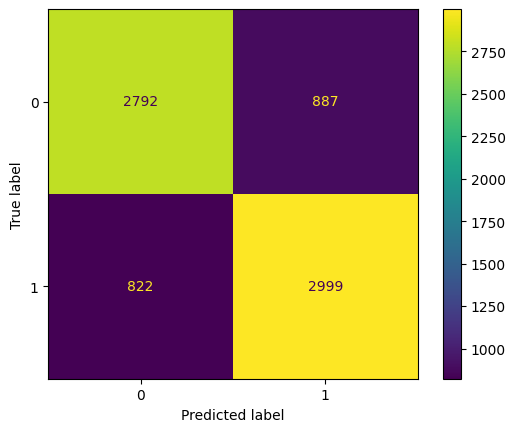

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

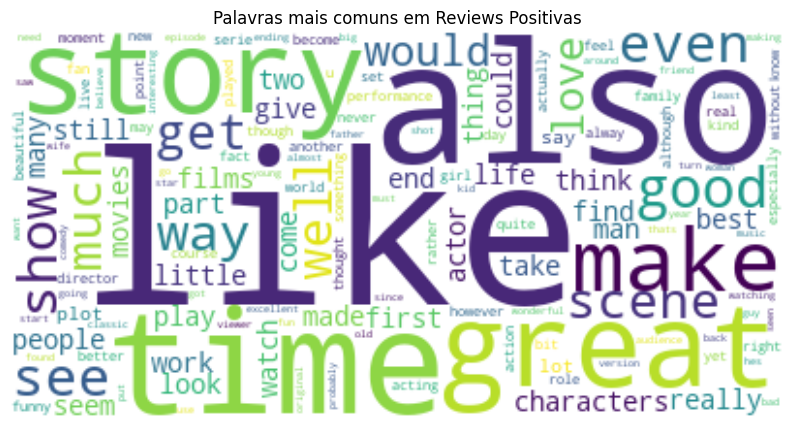

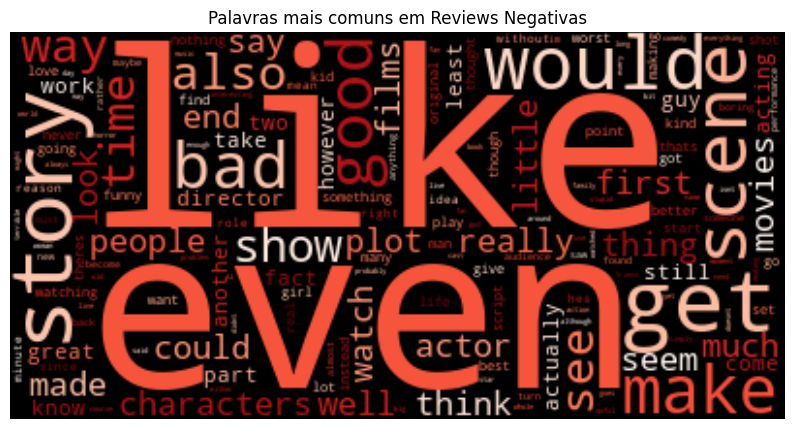

In [88]:
from wordcloud import WordCloud

custom_stopwords=(["Movie","film","one","character","br"])
# WordCloud para reviews positivas
positive_text = " ".join(df_teste[df_teste["is_pos"] == 1]["conteudo"])
wordcloud_pos = WordCloud(stopwords=custom_stopwords, background_color="white").generate(positive_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em Reviews Positivas")
plt.show()

# WordCloud para reviews negativas
negative_text = " ".join(df_teste[df_teste["is_pos"] == 0]["conteudo"])
wordcloud_neg = WordCloud(stopwords=custom_stopwords,background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais comuns em Reviews Negativas")
plt.show()